In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [3]:
df = pd.read_csv('C:\\Users\\Shree123\\ML_end2end_EC2_AWS\\notebook\\data\\Healthcare-Diabetes.csv')

In [4]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.drop(columns = ['Id'], inplace = True)
print(df.columns)
print('\n','-'*40)
print(df.info())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

 ----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB
None


In [6]:
print('Null values in the dataset:: \n\n', df.isnull().sum())
print('\n','-'*40)
print(df.describe())

Null values in the dataset:: 

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 ----------------------------------------
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000

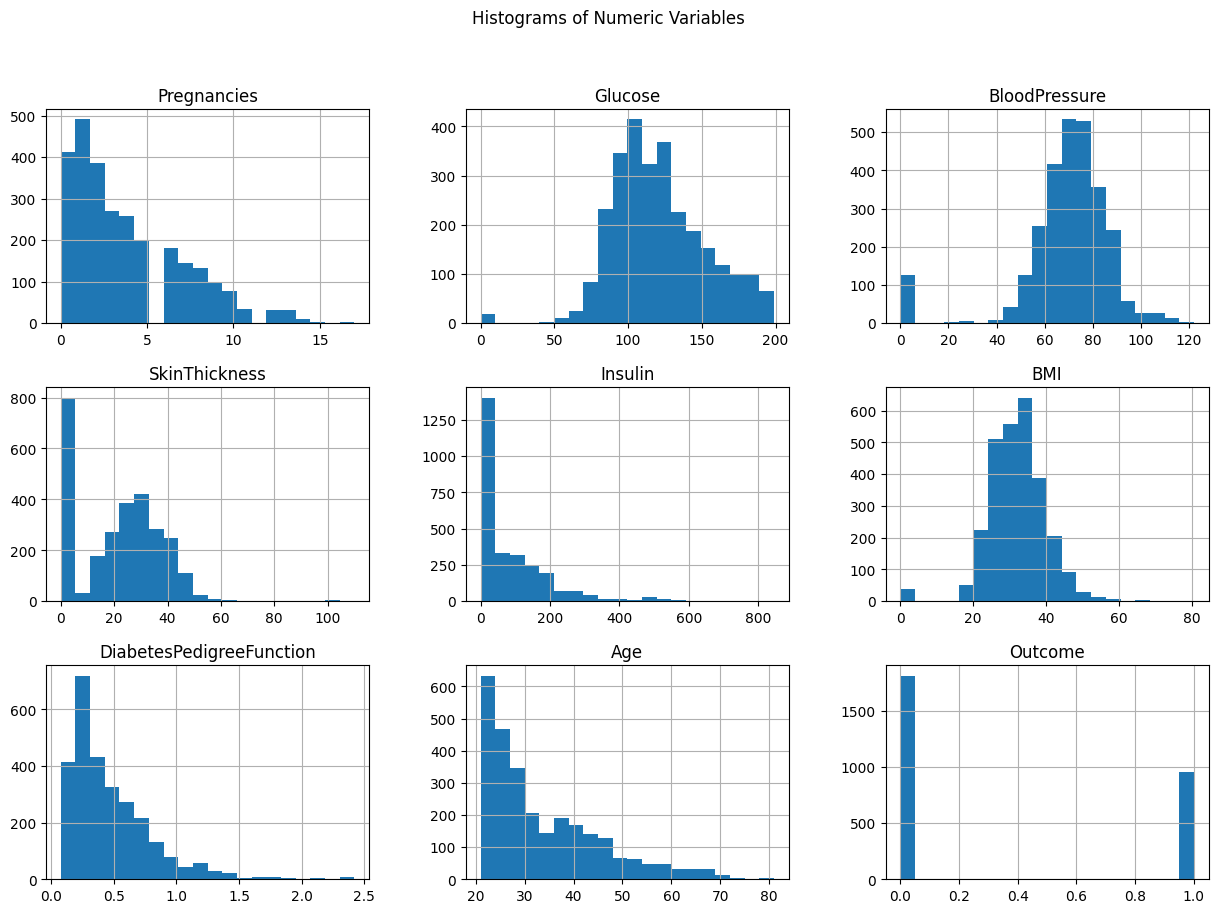

In [7]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

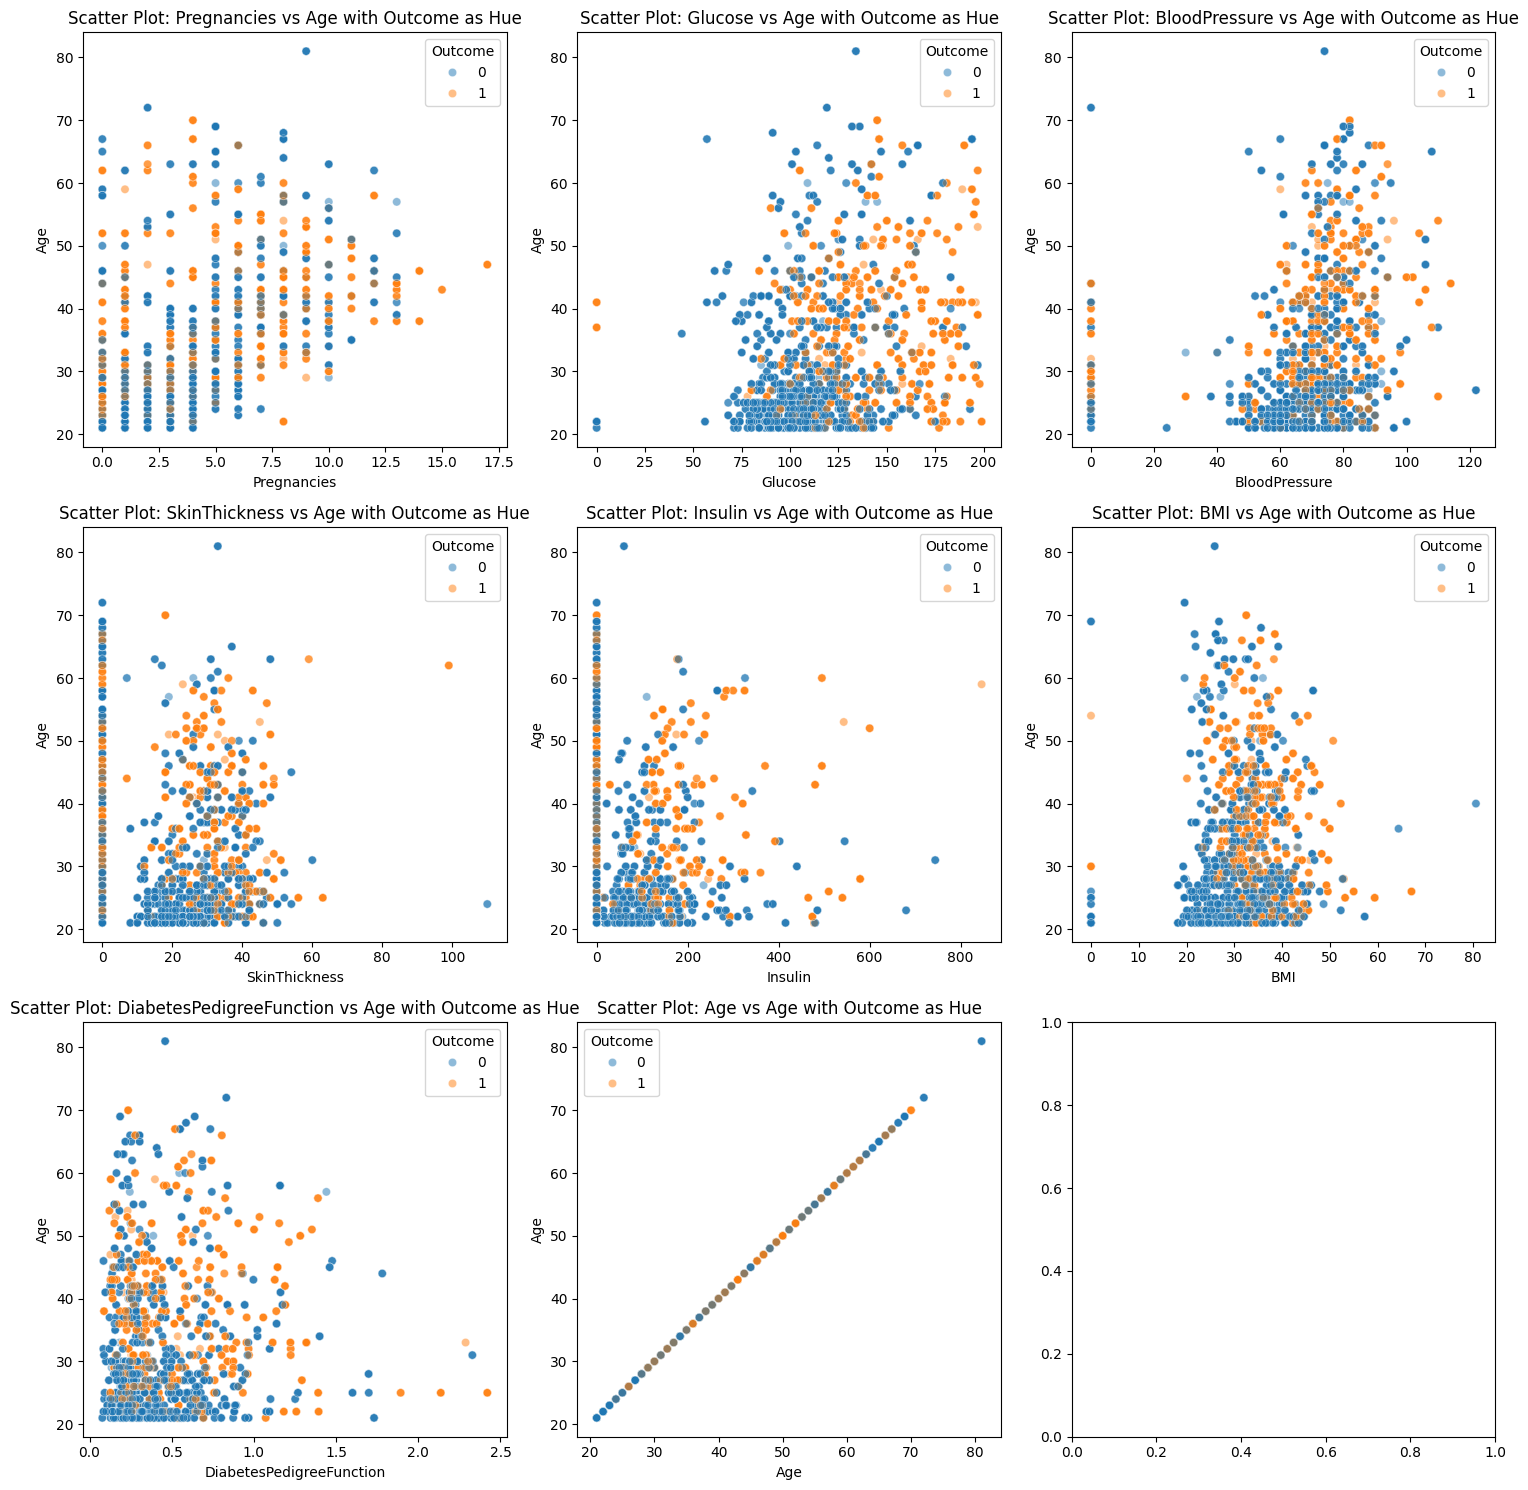

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(df.columns[:-1]):  # Exclude the last column ('Outcome')
    sns.scatterplot(x=col, y='Age', hue='Outcome', data=df, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter Plot: {col} vs Age with Outcome as Hue')
    axes[i].legend(title='Outcome')
plt.tight_layout()
plt.show()

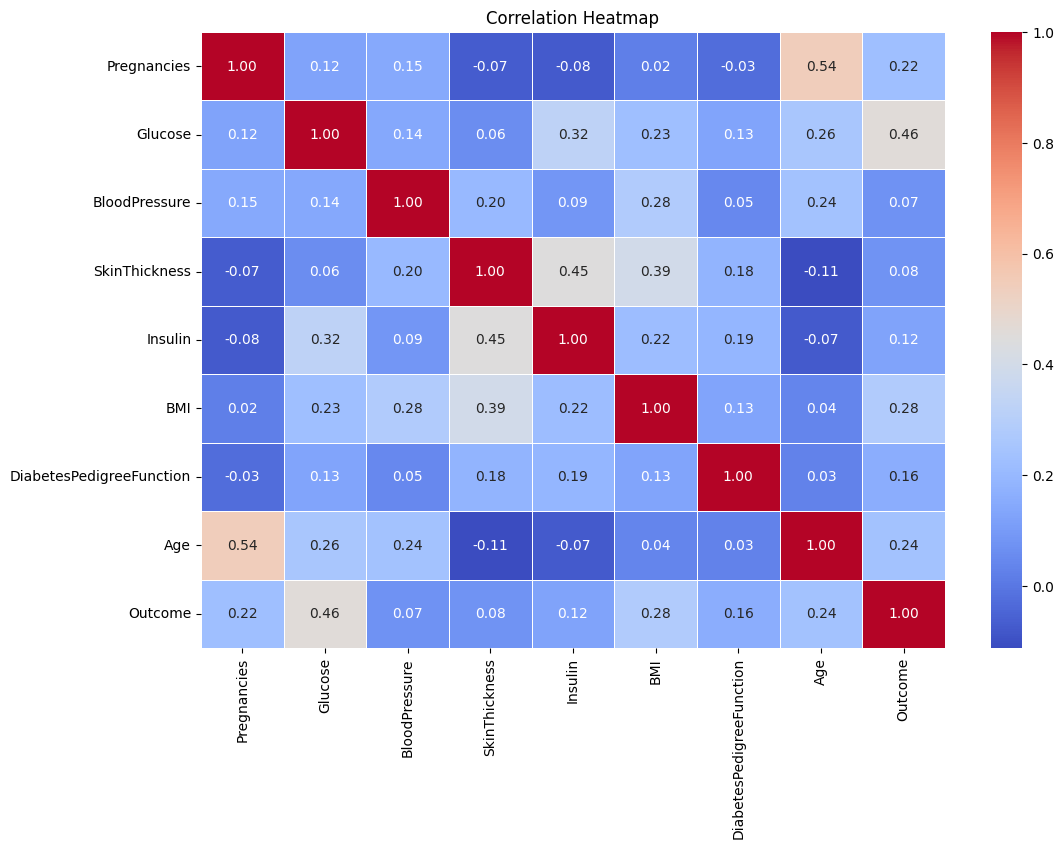

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

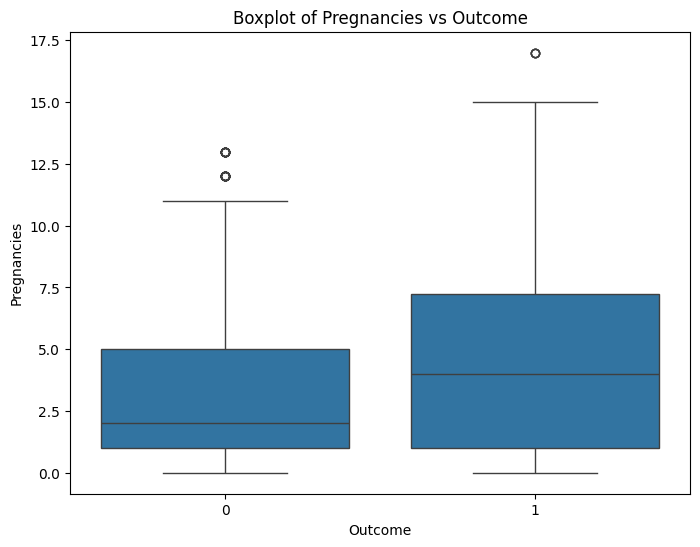

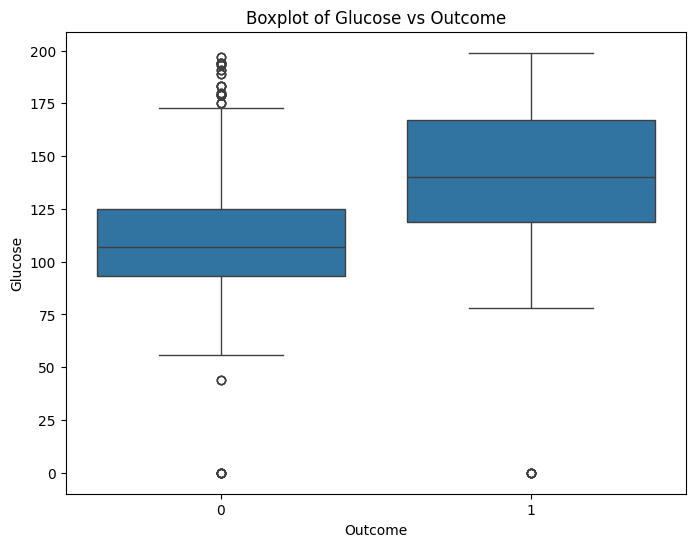

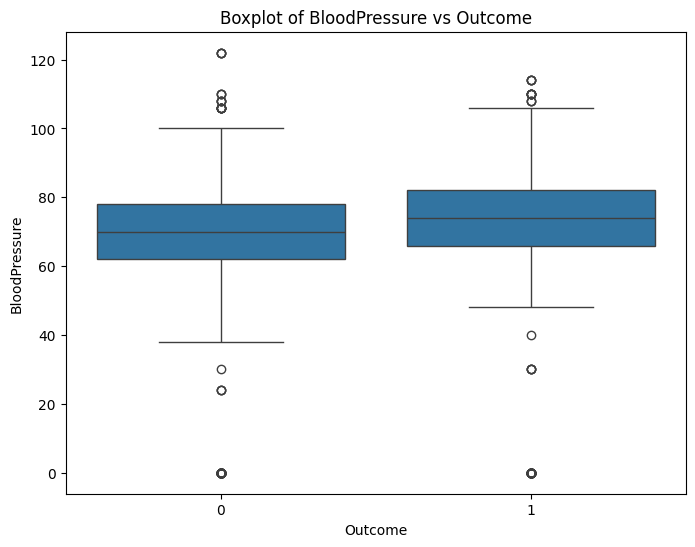

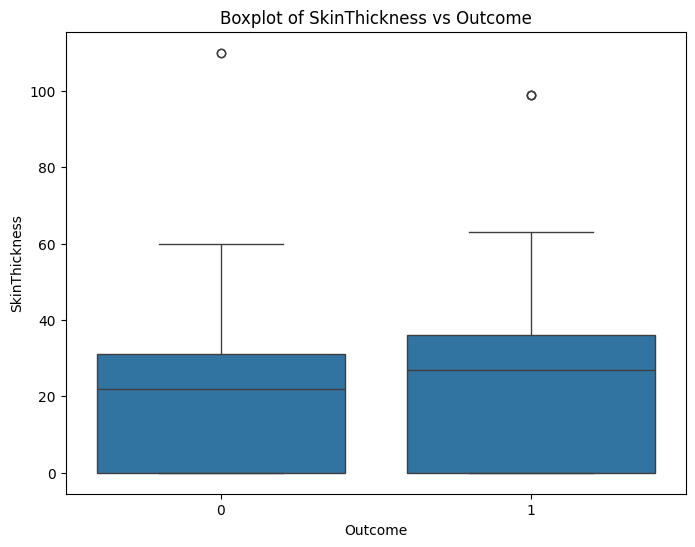

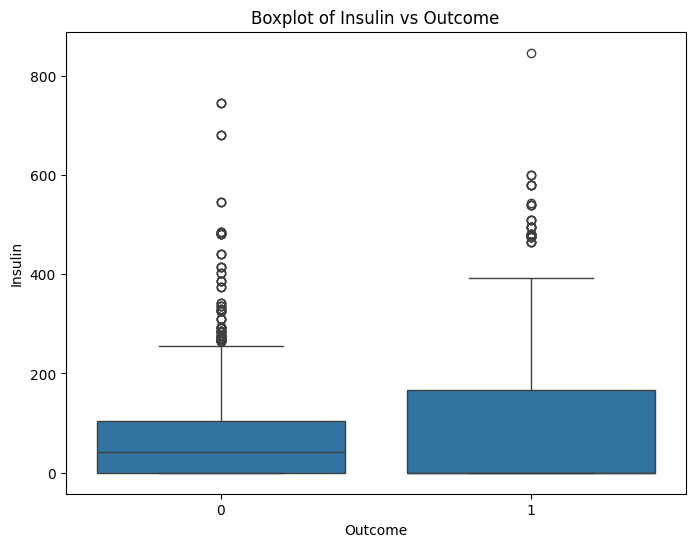

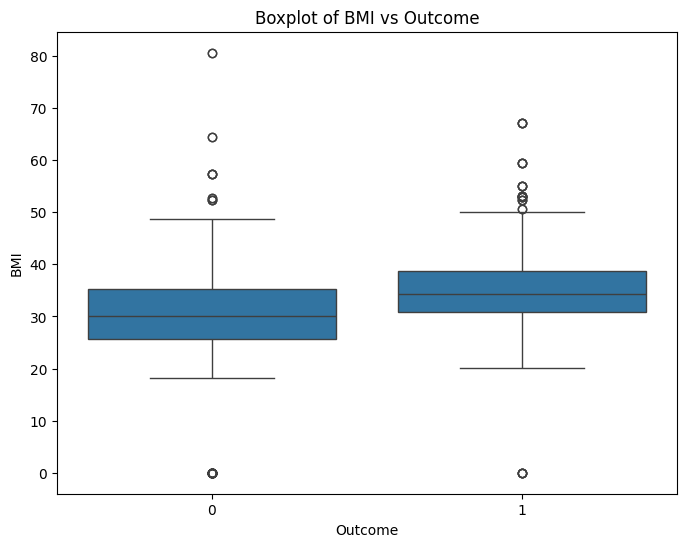

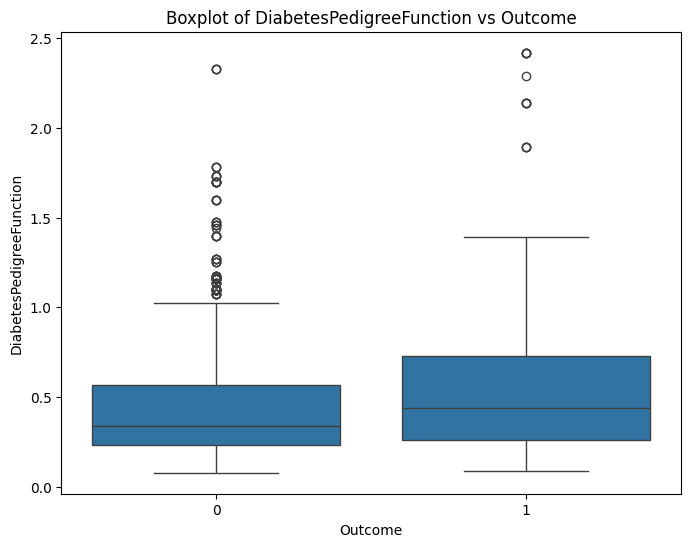

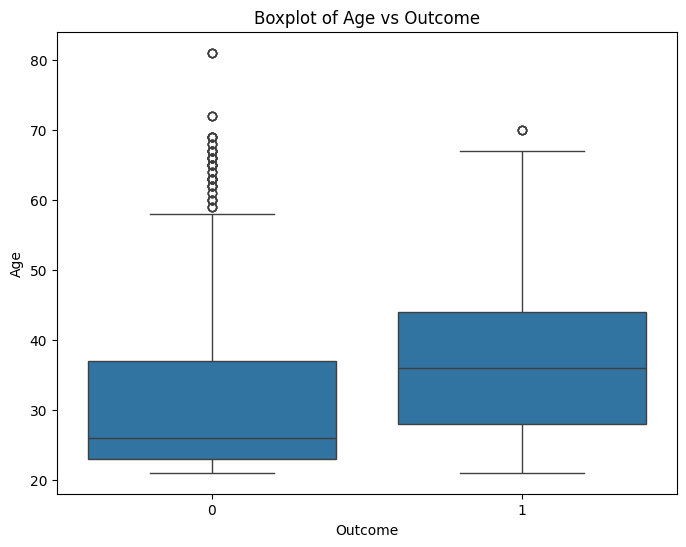

In [10]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y= col, data=df)
    plt.title(f'Boxplot of {col} vs Outcome')
    plt.show()

In [13]:
# Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.
df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64